In [1]:
# Introdução
# Este notebook implementa uma simulação simples de um neurônio usando o modelo de Hodgkin-Huxley

# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Constantes do modelo de Hodgkin-Huxley
C_m = 1.0  # capacitância da membrana, uF/cm^2
g_Na = 120.0  # condutância do sódio, mS/cm^2
g_K = 36.0  # condutância do potássio, mS/cm^2
g_L = 0.3  # condutância de fuga, mS/cm^2
E_Na = 50.0  # potencial de reversão do sódio, mV
E_K = -77.0  # potencial de reversão do potássio, mV
E_L = -54.387  # potencial de reversão de fuga, mV


In [3]:
# Funções auxiliares
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))


In [4]:
# Parâmetros da simulação
T = 50.0  # tempo total de simulação, ms
dt = 0.01  # passo de tempo, ms
time = np.arange(0, T + dt, dt)

# Estímulo de corrente
I = np.zeros(len(time))
I[1000:4000] = 10  # corrente de 10 uA/cm^2 entre 10 ms e 40 ms

# Inicialização de variáveis
V = np.zeros(len(time))
n = np.zeros(len(time))
m = np.zeros(len(time))
h = np.zeros(len(time))

V[0] = -65.0  # potencial de repouso, mV
n[0] = alpha_n(V[0]) / (alpha_n(V[0]) + beta_n(V[0]))
m[0] = alpha_m(V[0]) / (alpha_m(V[0]) + beta_m(V[0]))
h[0] = alpha_h(V[0]) / (alpha_h(V[0]) + beta_h(V[0]))

# Loop da simulação
for i in range(1, len(time)):
    V_prev = V[i-1]
    n_prev = n[i-1]
    m_prev = m[i-1]
    h_prev = h[i-1]
    
    # Correntes
    I_Na = (m_prev**3) * g_Na * h_prev * (V_prev - E_Na)
    I_K = (n_prev**4) * g_K * (V_prev - E_K)
    I_L = g_L * (V_prev - E_L)
    
    # Potencial de membrana
    V[i] = V_prev + dt * (I[i] - (I_Na + I_K + I_L)) / C_m
    
    # Variáveis de estado
    n[i] = n_prev + dt * (alpha_n(V_prev) * (1 - n_prev) - beta_n(V_prev) * n_prev)
    m[i] = m_prev + dt * (alpha_m(V_prev) * (1 - m_prev) - beta_m(V_prev) * m_prev)
    h[i] = h_prev + dt * (alpha_h(V_prev) * (1 - h_prev) - beta_h(V_prev) * h_prev)


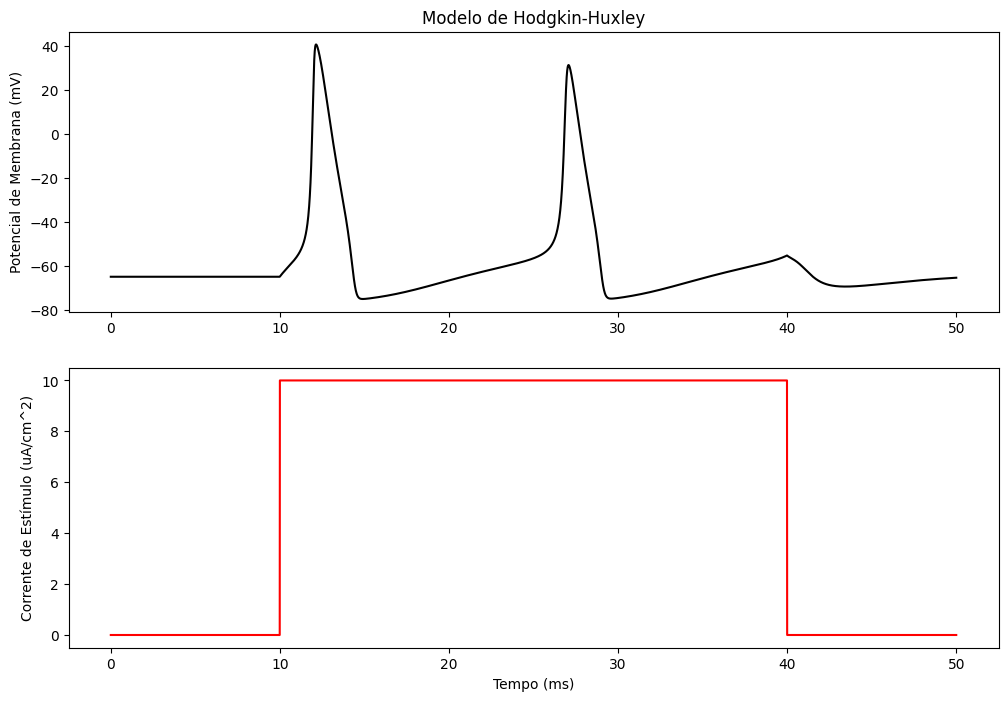

In [5]:
# Plotando os resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title('Modelo de Hodgkin-Huxley')
plt.plot(time, V, 'k')
plt.ylabel('Potencial de Membrana (mV)')

plt.subplot(2, 1, 2)
plt.plot(time, I, 'r')
plt.xlabel('Tempo (ms)')
plt.ylabel('Corrente de Estímulo (uA/cm^2)')

plt.show()
